# Microseismic data

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append("..")
import splitwavepy as sw

from obspy import read
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
datahome = '/Users/glyjw/Data/HornRiver/S_Well/'
st = read(datahome + '20130806.040535.S_Well.015.?')

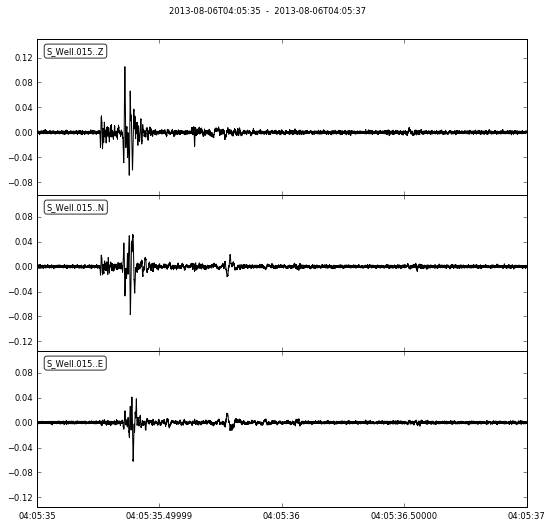

In [3]:
st.plot()

In [4]:
st[0].stats.sac['t1']

0.35075003

In [5]:
delta = st[0].stats.delta
t = sw.Trio(st[1].data,st[2].data,st[0].data,delta=delta)

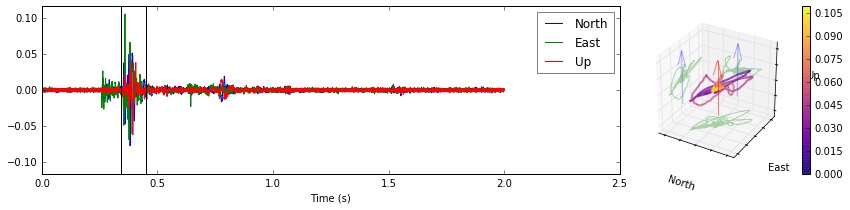

In [6]:
t.set_window(0.34,0.45,tukey=0.1)
t.plot()

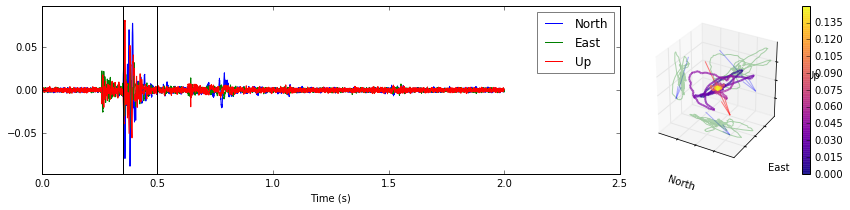

In [7]:
# t.set_window(0.4,0.5)
# t.set_ray()
# t.rotate2ray()
# t.plot()

t.set_window(0.35,0.5)
t.set_ray()
t.rotate2ray()
t.plot()

In [8]:
# get event info
from operator import itemgetter
keys = ['evla', 'evlo', 'evdp','stla','stlo','stdp']
evla, evlo, evdp, stla, stlo, stdp = itemgetter(*keys)(st[0].stats.sac)

In [17]:
dlo = stlo - evlo
dla = stla - evla
dz = evdp - stdp
# dz = stdp - evdp

azi = math.degrees( math.atan2( dlo, dla))
inc = math.degrees( math.atan2( (dlo**2+dla**2)**.5, dz))

print(azi,inc)

(-0.7651735990134442, 36.58074735860679)


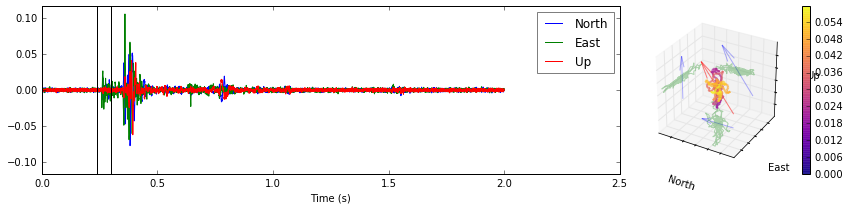

In [32]:
t.rotate2eye()
t.set_window(0.24,0.3)
t.set_ray(azi,inc)
# t.p_rotate()
t.plot()
# print(t.rayvecs)
# print(t.cmpvecs)


In [26]:
tc = t.copy()
tc.rotate2eye()
sw.core.eigcov(tc.chop().data())

(array([  2.32947968e-06,   1.48995093e-06,   1.21926892e-06]),
 array([[ 0.44578457, -0.06140138, -0.89303191],
        [-0.89505392, -0.04443277, -0.4437389 ],
        [-0.0124337 ,  0.99712366, -0.07476499]]))

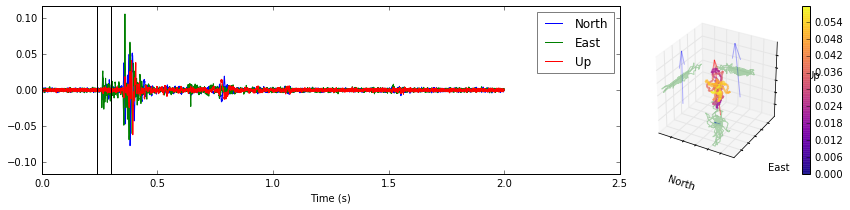

In [33]:
# t.cmpvecs
p = t.eigvecs()
p[:,0]
t.set_ray(p)
t.plot()

In [ ]:
# np.average(bs.stk_l1_l2,axis=0)

plt.contourf(m.tlags,m.degs,np.average(bs.stk_l1_l2,axis=0),26,cmap='magma')


In [ ]:
w2 = sw.Window(121,130)
# t.plot(window=w2)
tchop = t.copy()
tchop.chop(w2)
cov = np.cov(np.vstack((tchop.x,tchop.y,tchop.z)))
eigval, eigvec = np.linalg.eig(cov)
idx = np.argsort(eigval)[::-1]
eigval = eigval[idx]
eigvec = eigvec[:,idx]

In [ ]:
# rotate data into eigenvector system.
trot = t.copy()
trot.x,trot.y,trot.z = np.dot(eigvec.T,trot.xyz())
trot.plot(window=w2)

In [ ]:
np.co

In [ ]:
import colorcet as cc